Причастные к созданию;

Шкобин   Ю.Г. (M01-902)

Черноног В.В. (M01-906)

Трусов   А.В  (M01-901)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

csfont = {'fontname':'Helvetica'}
import warnings
warnings.filterwarnings('ignore')



In [2]:
def drawGraph(x,func,xlabel="", ylabel="",**arg):
    plt.plot(x, func(x,**arg))
    ax = plt.gca()
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.ylabel(xlabel,fontsize=20,labelpad=-200,rotation=0)
    plt.xlabel(ylabel,fontsize=20,labelpad=-145,rotation=0)
    plt.show()

In [3]:
def drawGraph3D(z,func,limits=1,xlabel="", ylabel="",zlabel ="",**arg):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    xy = func(z,**arg)
    x= np.real(xy)
    y = np.imag(xy)
    ax.plot(xs=x,ys=y,zs=z)
    ax.set_xlabel(xlabel, fontsize=13)
    ax.set_ylabel(ylabel, fontsize=13)
    ax.set_zlabel(zlabel, fontsize=13)
    ax.set_xlim(-limits,limits)
    ax.set_ylim(-limits,limits)
    plt.show()

# Задача №1

Дано:

$x(t) = A(1+\dfrac{1}{2}\cos(2 \pi f_1 t))cos(2 \pi f_2 t)$

$t \in (-\infty,\infty)$    

$f_1 =10^4$

$f_2 =10^6$     

Найти:

$f_{Д_{min}} - ?$


$|H(f)| - ?$

In [4]:
def x1_1(t,f1=4,f2=6):
    return (1+1/2*np.cos(2*np.pi*10**f1*t))*np.cos(2*np.pi*10**f2*t)

In [5]:
_ =interact(drawGraph,
         xlabel=fixed("t"),
         ylabel=fixed("x(t)"),
         x=fixed(np.linspace(-0.001,0.001,1000000)),
         func=fixed(x1_1),
         f1= widgets.FloatSlider(value=4,
                               min=1,
                               max=8,
                               step=0.1),
        f2= widgets.FloatSlider(value=6,
                               min=1,
                               max=8,
                               step=0.1))


interactive(children=(FloatSlider(value=4.0, description='f1', max=8.0, min=1.0), FloatSlider(value=6.0, descr…

Решенине:


Преобразуем сигнал с помощью формулы произведения косминусов

$x(t) = A\cos(2 \pi f_2 t) + \dfrac{A}{4} (\cos(2\pi(f1+f2)t)+ \cos(2\pi(f1-f2)t))$

Известно:

$ПФ[A\cos(2 \pi f_0 t)] = \dfrac{A}{2}(\delta(f-f_0)+ \delta(f+f_0)$

В силу линейности ПФ:

$X(f) = \dfrac{A}{2}\left(\delta(f-f_2)+ \dfrac{1}{4}\delta(f-f_1- f_2)
+\dfrac{1}{4}\delta(f+f_1- f_2) + \delta(f+f_2) + \dfrac{1}{4}\delta(f-f_1+ f_2) +  \dfrac{1}{4}\delta(f+f_1+ f_2)\right)$

In [6]:
def drawdelta_2(limitsx,f1=4,f2=6):
    ax = plt.axes()
    ax.set_xlim(limitsx)
    ax.set_ylim([0,1.4])
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.annotate('$|X(f)|$', xy=(0.2,1.4),size=15)
    plt.annotate('$f$', xy=(limitsx[1],0),size=15)
    #plt.ylabel("|X(f)|",fontsize=20,labelpad=0,rotation=1)
    #plt.xlabel("f",fontsize=20,labelpad=0,rotation=0)
    ax.arrow(f2, 0, 0, 1, head_width=0.5, head_length=0.1, fc='k', ec='k')
    plt.annotate('$\\left(\\frac{A}{2}\\right)$', xy=(f2,1.1),size=15)
    ax.arrow(f2+f1, 0, 0, 0.25, head_width=0.5, head_length=0.1, fc='k', ec='k')
    plt.annotate('$\\left(\\frac{A}{8}\\right)$', xy=(f2+f1,0.35),size=15)
    ax.arrow(f2-f1, 0, 0, 0.25, head_width=0.5, head_length=0.1, fc='k', ec='k')
    plt.annotate('$\\left(\\frac{A}{8}\\right)$', xy=(f2-f1,0.35),size=15)

    ax.arrow(-f2, 0, 0, 1, head_width=0.5, head_length=0.1, fc='k', ec='k')
    plt.annotate('$\\left(\\frac{A}{2}\\right)$', xy=(-f2,1.1),size=15)
    ax.arrow(-f2-f1, 0, 0, 0.25, head_width=0.5, head_length=0.1, fc='k', ec='k')
    plt.annotate('$\\left(\\frac{A}{8}\\right)$', xy=(-f2-f1,0.35),size=15)
    ax.arrow(-f2+f1, 0, 0, 0.25, head_width=0.5, head_length=0.1, fc='k', ec='k')
    plt.annotate('$\\left(\\frac{A}{8}\\right)$', xy=(-f2+f1,0.35),size=15)
    plt.show()

In [7]:
_ =interact(drawdelta_2,
         limitsx=fixed((-12,12)),
         f1= widgets.FloatSlider(value=2,
                               min=1,
                               max=8,
                               step=1),
        f2= widgets.FloatSlider(value=6,
                               min=1,
                               max=8,
                               step=1))

interactive(children=(FloatSlider(value=2.0, description='f1', max=8.0, min=1.0, step=1.0), FloatSlider(value=…

Теперь очевидно, что x(t) можно считать полосовым сигналом,а в силу  $f_2>>f_1$, будем считать узкополосным с параметрами 

$f_0 = f_2$ -несущая

$2f_B = 2f_1$ - полоса


Оценим порядок субдескритезации

$m < \dfrac{f_0 - f_B}{2f_B} = \dfrac{10^6 - 10^4}{2 \cdot 10^4} = 49,5$

Так как ищем минимальную $f_Д$, то m должен быть максимальным , то есть 

$m = 49$


Тогда:

$2 \cdot \dfrac{f_0 + f_B}{m +1} < f_Д < 2\cdot\dfrac{f_0-f_B}{m}$

$ 40400 < f_Д <40408$

Именно  в  этом диапазоне  лежит $f_{Д_{min}}$ Частоту $f =4400$ брать нельзя так как произойдет наложение наложение спектров на $f_1 + f_2$ в частности, а значит точного восстановления не будет


Для восстановления исходного сигнала достаточно выделить фильтром исходный спектр:

\begin{equation*}
H(f) = 
 \begin{cases}
   1 &  f \in [-f_1 -f_2;f_1-f_2]\cup [f_2 -f_1;f_2+f_1]\\
   0 &  \text{else} 
 \end{cases}
\end{equation*}



In [8]:
def x1_2(t,f1,f2):
    return np.heaviside(t-(-f1-f2),1) - np.heaviside(t-(f1-f2),1) +\
            np.heaviside(t-(f2-f1),1) - np.heaviside(t-(f1+f2),1)

### Масштаб не соблюден, важен лишь общий вид

In [9]:
_ =interact(drawGraph,
         xlabel=fixed("t"),
         ylabel=fixed("H(t)"),
         x=fixed(np.linspace(-20,20,1000)),
         func=fixed(x1_2),
         f1= widgets.FloatSlider(value=2,
                               min=1,
                               max=8,
                               step=1),
        f2= widgets.FloatSlider(value=6,
                               min=1,
                               max=8,
                               step=1))

interactive(children=(FloatSlider(value=2.0, description='f1', max=8.0, min=1.0, step=1.0), FloatSlider(value=…

# Задача №2


Дано:

$B = f_2 - f_1 = 5\cdot 10^6$

$f_Д = 2B$

$1)f_2 = 3B$

$2)f_2 = 4B$

$4)f_2 = 4,5B$

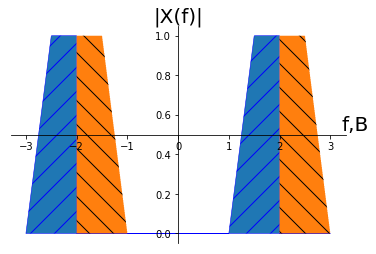

In [10]:
def frac(x):
    return x - x.astype(int) + (x < 0)
def mod2(x):
    return (x + (x < 0)).astype(int) % 2 
def f(x):
    return mod2(x) * ((frac(x) < 0.5)*frac(x)*2 + (frac(x) >= 0.5) * 1)
 

x = np.linspace(-3, 3, 1000)

plt.fill_between(x, f(x),hatch="/", edgecolor="b", linewidth=0.5)
plt.fill_between(x, f(-x), step='mid',hatch="\\")
ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel("f,B",fontsize=20,labelpad=-200,rotation=0)
plt.xlabel("|X(f)|",fontsize=20,labelpad=-145,rotation=0)
plt.show()

Опираясь на график $|X(f)|$ будем считать сигнал узкополосным с параметрами

$f_0 = \dfrac{f_1+f_2}{2}$

$2\cdot f_B = B$


Так как $f_Д = 2(2f_0)$, а не $f_Д= 2f_2$, то имеет место субдискретизация

Спектр дискретизованного сигнала - размноженный исходный спектр с частотой $f_Д$

а) $f_2 =  3B$

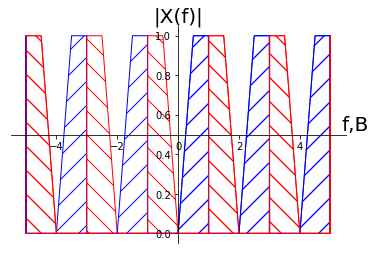

In [11]:
def frac(x):
    return x - x.astype(int) + (x < 0)
def mod2(x):
    return (x + (x < 0)).astype(int) % 2 
def f(x):
    return mod2(x) * ((frac(x) < 0.5)*frac(x)*2 + (frac(x) >= 0.5) * 1)

x = np.linspace(-5, 5, 1000)
plt.fill_between(x, f(x+1),hatch="/", facecolor="none",edgecolor="b")
plt.fill_between(x, f(-x-1), facecolor="none",hatch="\\",edgecolor="r")
plt.fill_between(x, f(x+3),hatch="/", facecolor="none",edgecolor="b")
plt.fill_between(x, f(-x-3), facecolor="none",hatch="\\",edgecolor="r")


ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel("f,B",fontsize=20,labelpad=-200,rotation=0)
plt.xlabel("|X(f)|",fontsize=20,labelpad=-145,rotation=0)
plt.show()

б) $f_2 =  4B$

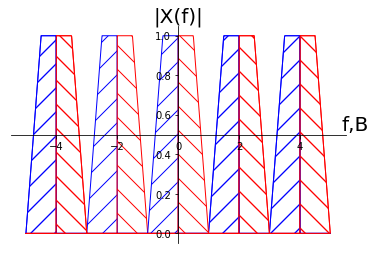

In [12]:
def frac(x):
    return x - x.astype(int) + (x < 0)
def mod2(x):
    return (x + (x < 0)).astype(int) % 2 
def f(x):
    return mod2(x) * ((frac(x) < 0.5)*frac(x)*2 + (frac(x) >= 0.5) * 1)

x = np.linspace(-5, 5, 1000)
plt.fill_between(x, f(x),hatch="/", facecolor="none",edgecolor="b")
plt.fill_between(x, f(-x), facecolor="none",hatch="\\",edgecolor="r")
plt.fill_between(x, f(x+2),hatch="/", facecolor="none",edgecolor="b")
plt.fill_between(x, f(-x-2), facecolor="none",hatch="\\",edgecolor="r")
ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel("f,B",fontsize=20,labelpad=-200,rotation=0)
plt.xlabel("|X(f)|",fontsize=20,labelpad=-145,rotation=0)
plt.show()

в) $f_2 =  4,5B$

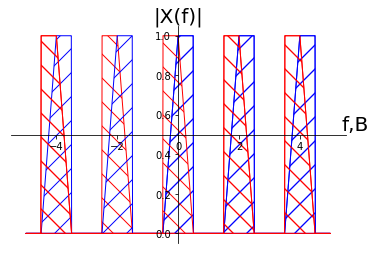

In [13]:
def frac(x):
    return x - x.astype(int) + (x < 0)
def mod2(x):
    return (x + (x < 0)).astype(int) % 2 
def f(x):
    return mod2(x) * ((frac(x) < 0.5)*frac(x)*2 + (frac(x) >= 0.5) * 1)

x = np.linspace(-5, 5, 1000)
plt.fill_between(x, f(x+1.5),hatch="/", facecolor="none",edgecolor="b")
plt.fill_between(x, f(-x -0.5 ), facecolor="none",hatch="\\",edgecolor="r")
plt.fill_between(x, f(x+3.5),hatch="/", facecolor="none",edgecolor="b")
plt.fill_between(x, f(-x-2.5), facecolor="none",hatch="\\",edgecolor="r")

ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel("f,B",fontsize=20,labelpad=-200,rotation=0)
plt.xlabel("|X(f)|",fontsize=20,labelpad=-145,rotation=0)
plt.show()

Для объяснения наложения построим разрешенные зоны субдискретизации
и отметим точки, соответствующие случа ям а, б, в

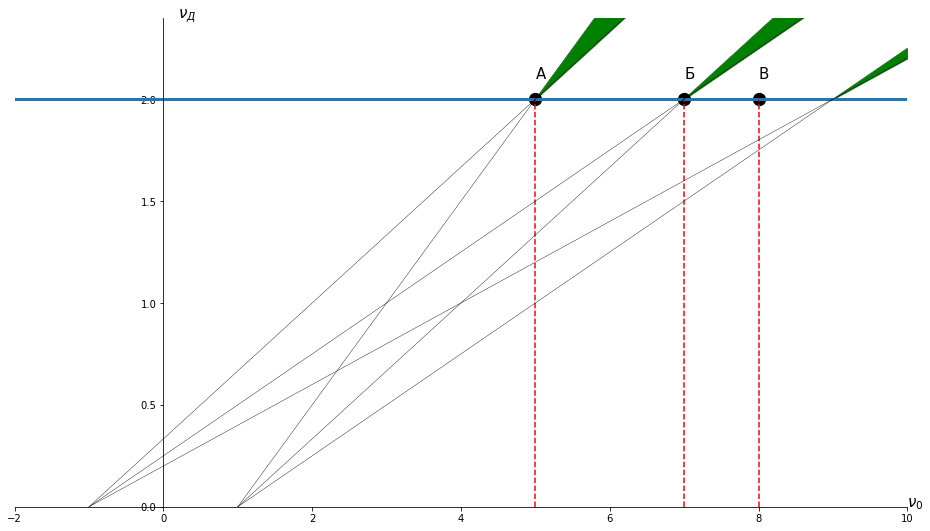

In [14]:
plt.rcParams["figure.figsize"] = [16,9]
limitsx = (-2,10)
ax = plt.axes()
ax.set_xlim(limitsx)
ax.set_ylim([0,2.4])
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.annotate('$\\nu_Д$', xy=(0.2,2.4),size=15)
plt.annotate('$\\nu_0$', xy=(limitsx[1],0),size=15)

x = np.linspace(limitsx[0], 10, 1000)
plt.plot(x,[2]*1000,linewidth=3)
plt.plot([5,5],[0,2],linestyle = '--', color = 'red')
plt.plot([7,7],[0,2],linestyle = '--', color = 'red')
plt.plot([8,8],[0,2],linestyle = '--', color = 'red')
plt.plot([-1,5,11],[0,2,4],color='black',linewidth=0.4)
plt.plot([-1,7,15],[0,2,4],color='black',linewidth=0.4)
plt.plot([-1,9,19],[0,2,4],color='black',linewidth=0.4)

plt.plot([1,5,9],[0,2,4],color='black',linewidth=0.4)
plt.plot([1,7,13],[0,2,4],color='black',linewidth=0.4)
plt.plot([1,9,17],[0,2,4],color='black',linewidth=0.4)
ax.fill_between([5,10],[2,4.5],[2,5/3+2],color='green')
ax.fill_between([7,10],[2,3],[2,2.75],color='green')
ax.fill_between([9,10],[2,2.25],[2,2+0.2],color='green')
plt.scatter([5],[2],s=150,color='black')
plt.scatter([7],[2],s=150,color='black')
plt.scatter([8],[2],s=150,color='black')
plt.annotate('А', xy=(5,2.1),size=15)
plt.annotate('Б', xy=(7,2.1),size=15)
plt.annotate('В', xy=(8,2.1),size=15)
plt.show()

В случаях а,б мы попадаем на край разрешенной зоны , но по нашему предположению спектральная плотность равна нулю на граничных частотах, поэтому наложения не происходит

В случае в мы далеки от разрешенной зоны и поэтому происходит наложение

# Задача №3

Дано

$x(k)$ - действительная N-точечня последовательность

$X(\nu)|_{\nu = n\Delta \nu} = X(n)$

$\Delta \nu = \dfrac{1}{N}$

Показать

инверсию $X(n)= Y(n)$

где

$y(k) = (-1)^k\cdot x(k)$

Решение:

$X(n) = \dfrac{1}{N}\sum\limits_{k=0}^{N-1}x(k) W_N^{-nk} $

$W_N^{-nk} = \exp(-j \dfrac{2 \pi}{N} nk)$

$(-1)^k = \exp(j \pi k)$

$Y(n) = \dfrac{1}{N}\sum\limits_{k=0}^{N-1}x(k)\cdot\exp(j \pi k) \cdot  \exp(-j \dfrac{2 \pi}{N} nk) = $

$=\dfrac{1}{N}\sum\limits_{k=0}^{N-1}x(k) \cdot  \exp(-j \dfrac{2 \pi}{N} (n- \dfrac{N}{2})\cdot k)$


\begin{equation*}
Y(n) = 
 \begin{cases}
   X(n- \dfrac{N}{2}) &  n \in \dfrac{N}{2},N\\
   X(n+ \dfrac{N}{2}) &  n \in 0,\dfrac{N}{2} -1
 \end{cases}
\end{equation*}


Полученное выражение соответствует инверсии спектра 

для $Y(\nu)$ рассуждения аналогичны, только инверсия будет выражаться в сдвиге на $\dfrac{1}{2}$ по оси $\nu $

В случае синусоиды с $\nu = 0,125$ инверсия спектра будет выглядеть следующим образом:


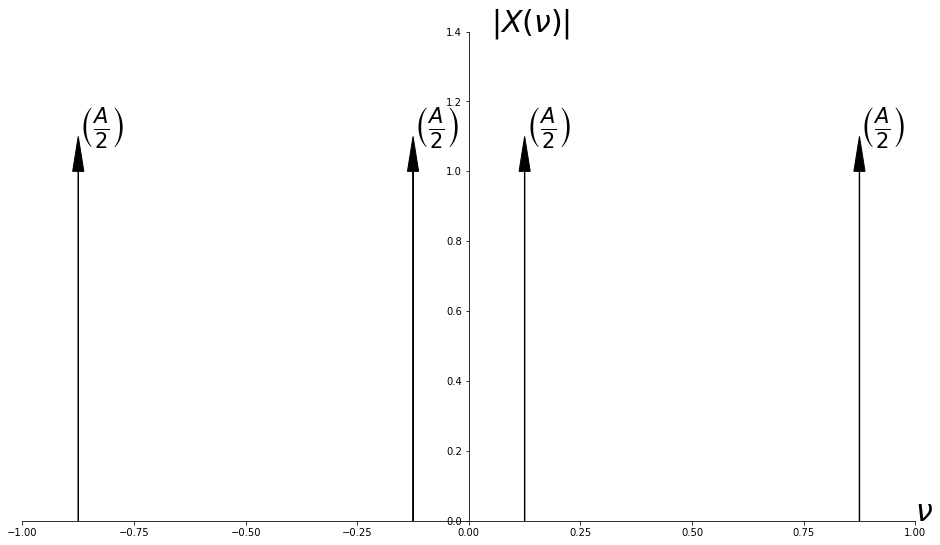

In [15]:
limitsx = (-1,1)
ax = plt.axes()
ax.set_xlim(limitsx)
ax.set_ylim([0,1.4])
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.annotate('$|X(\\nu)|$', xy=(0.05,1.4),size=30)
plt.annotate('$\\nu$', xy=(limitsx[1],0),size=30)
f2 = 1/8
ax.arrow(f2, 0, 0, 1, head_width=0.025, head_length=0.1, fc='k', ec='k')
plt.annotate('$\\left(\\frac{A}{2}\\right)$', xy=(f2,1.1),size=30)
f2 = -1/8
ax.arrow(f2, 0, 0, 1, head_width=0.025, head_length=0.1, fc='k', ec='k')
plt.annotate('$\\left(\\frac{A}{2}\\right)$', xy=(f2,1.1),size=30)

f2 = 7/8
ax.arrow(f2, 0, 0, 1, head_width=0.025, head_length=0.1, fc='k', ec='k')
plt.annotate('$\\left(\\frac{A}{2}\\right)$', xy=(f2,1.1),size=30)

f2 = -7/8
ax.arrow(f2, 0, 0, 1, head_width=0.025, head_length=0.1, fc='k', ec='k')
plt.annotate('$\\left(\\frac{A}{2}\\right)$', xy=(f2,1.1),size=30)
plt.show()

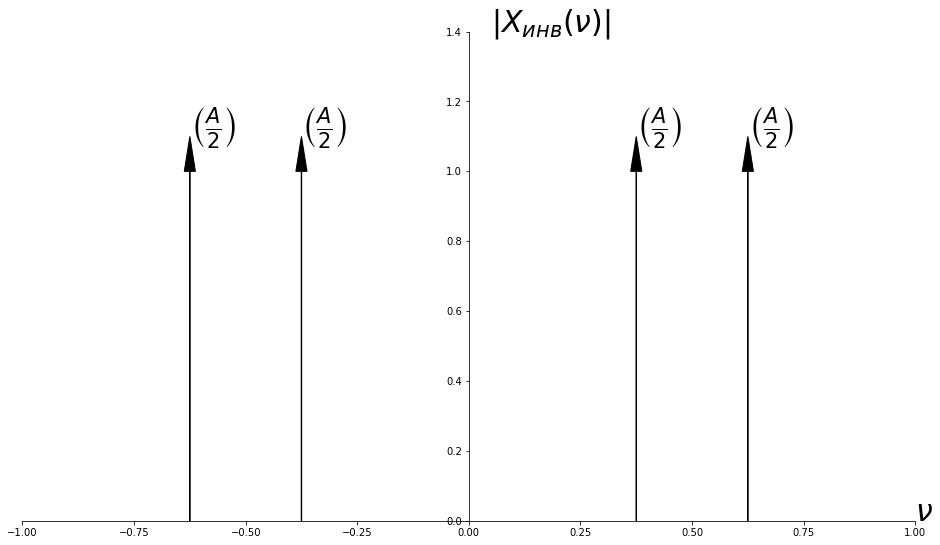

In [16]:
limitsx = (-1,1)
ax = plt.axes()
ax.set_xlim(limitsx)
ax.set_ylim([0,1.4])
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.annotate('$|X_{инв}(\\nu)|$', xy=(0.05,1.4),size=30)
plt.annotate('$\\nu$', xy=(limitsx[1],0),size=30)
f2 = 3/8
ax.arrow(f2, 0, 0, 1, head_width=0.025, head_length=0.1, fc='k', ec='k')
plt.annotate('$\\left(\\frac{A}{2}\\right)$', xy=(f2,1.1),size=30)
f2 = -3/8
ax.arrow(f2, 0, 0, 1, head_width=0.025, head_length=0.1, fc='k', ec='k')
plt.annotate('$\\left(\\frac{A}{2}\\right)$', xy=(f2,1.1),size=30)

f2 = 5/8
ax.arrow(f2, 0, 0, 1, head_width=0.025, head_length=0.1, fc='k', ec='k')
plt.annotate('$\\left(\\frac{A}{2}\\right)$', xy=(f2,1.1),size=30)

f2 = -5/8
ax.arrow(f2, 0, 0, 1, head_width=0.025, head_length=0.1, fc='k', ec='k')
plt.annotate('$\\left(\\frac{A}{2}\\right)$', xy=(f2,1.1),size=30)
plt.show()